In [1]:
import sys
sys.path.append('..')

In [2]:
import tagnews

In [3]:
df = tagnews.load_data()

..\tagnews\utils\load_data.py:194: RuntimeWarning: 1 location strings were not found in the bodytext.
  RuntimeWarning)


In [4]:
crimetags = tagnews.CrimeTags()
geoextractor = tagnews.GeoCoder()

In [5]:
preds = df['bodytext'].apply(crimetags.tagtext_proba)

In [6]:
preds.shape

(399934, 38)

In [7]:
preds.columns

Index(['ARSN', 'BEAT', 'BURG', 'CCCC', 'CCJ', 'CCSP', 'CPBD', 'CPD', 'CPLY',
       'CPS', 'CPUB', 'DOMV', 'DRUG', 'DUI', 'ENVI', 'FRUD', 'GANG', 'GLBTQ',
       'GUNV', 'HOMI', 'IDOC', 'ILSC', 'ILSP', 'IMMG', 'IPRA', 'JUVE', 'OEMC',
       'PARL', 'POLB', 'POLM', 'PROB', 'REEN', 'ROBB', 'SAO', 'SEXA', 'TASR',
       'UNSPC', 'VIOL'],
      dtype='object')

In [8]:
(preds['ARSN'] > 0.7).sum()

1134

In [9]:
(preds['TASR'] > 0.7).sum()

147

In [15]:
geostrings = df.loc[preds['TASR'] > 0.7, 'bodytext'].apply(geoextractor.extract_geostrings)

In [22]:
lat_longs = geostrings.apply(lambda x: geoextractor.lat_longs_from_geostring_lists(x, sleep_secs=5))

Status code Unknown from https://services.gisgraphy.com/geocoding/: ERROR - HTTPSConnectionPool(host='services.gisgraphy.com', port=443): Max retries exceeded with url: /geocoding/?address=block+of+South+Oglesby.&limitnbresult=1&format=json (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x0000029ED6C59EB8>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))
Status code 401 from https://services.gisgraphy.com/geocoding/: ERROR - 401 Client Error: Unauthorized for url: https://services.gisgraphy.com/geocoding/?address=7400+South+Wabash+Chicago+Illinois&limitnbresult=1&format=json
Status code 401 from https://services.gisgraphy.com/geocoding/: ERROR - 401 Client Error: Unauthorized for url: https://services.gisgraphy.com/geocoding/?address=Far+South+Side%2C&limitnbresult=1&format=json
Status code 401 from https://services.gisgraphy.com/geocoding/: ERROR - 401 Client Error: Unauthorized for url: https://services.gisgraphy.com/ge

In [34]:
import numpy as np
import matplotlib.pyplot as plt

In [49]:
coords = np.array([x for ll in lat_longs.tolist() for x in ll[0] if ll[0] and x is not None])

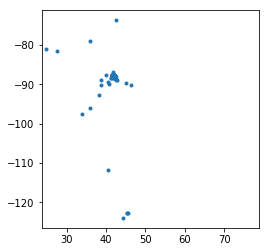

In [55]:
plt.plot(coords[:, 0], coords[:, 1], '.')
plt.axis('square')
plt.show()

In [56]:
import folium

from folium.plugins import HeatMap

In [71]:
m = folium.Map(location=[41.87871, -87.6298])

# for coord in coords:
#     folium.Marker(coord).add_to(m)

HeatMap(np.unique(coords, axis=0).tolist()).add_to(m)

m